The  data  is  available  as  two  attached  CSV  files:\
    takehome_user_engagement. csv\
    takehome_users . csv\
    
The  data  has  the  following  two  tables:\
   1)  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years.   This  table  includes:\
       ● name:  the  user's  name\
       ● object_id:   the  user's  id\
       ● email:  email  address\
       ● creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:\
          ○ PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace\
          ○ GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)\
          ○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)\
          ○ SIGNUP:  signed  up  via  the  website\
          ○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)\
        ● creation_time:  when  they  created  their  account\
        ● last_session_creation_time:   unix  timestamp  of  last  login\
        ● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails\
        ● enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip\
        ● org_id:   the  organization  (group  of  users)  they  belong  to\
        ● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).
        
2)  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product.

**Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption.**

We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data you  think  would  be  valuable.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
users = pd.read_csv('G:/My Drive/Jun/Mechine Learning/Data Science/Career/Take Home Challenge/relax_challenge/takehome_users.csv', encoding='latin1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engagement = pd.read_csv(r'G:\My Drive\Jun\Mechine Learning\Data Science\Career\Take Home Challenge\relax_challenge\takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
print(engagement.time_stamp.min())
print(engagement.time_stamp.max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [5]:
#check how many users and how many logins
print('There were {} users and {} total logins.'.format(
    engagement['user_id'].nunique(), len(engagement)))

There were 8823 users and 207917 total logins.


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### Finding out adopted users

In [7]:
# convert time_stamp into datetime format
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def logins_in_days(df, days=7, logins=3):
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [9]:
# run the function on all users
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [11]:
adopted.reindex()
adopted.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: adopted_user, dtype: bool

In [12]:
print('There were {} adopted users out of {} users.'.format(sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users.


### 1. Data Wrangling

In [13]:
# name is not relevant for analysis. Let's drop this column.
users.drop('name', axis=1, inplace=True)
users.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
# Convert time stamps to datetime objects
users.creation_time = pd.to_datetime(users.creation_time)
#last_session_creation_time is a unix time stamp, so use map to convert to datetime
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda data: 
                                    dt.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'), na_action='ignore')


In [15]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
                                                                              
# Create two new features by subtraction
users['active_days'] = users['last_session_creation_time'] - users['creation_time']
users['active_days'] = users['active_days'].dt.days

users['account_age'] = max(users['creation_time']) - users['creation_time']
users['account_age'] = users['account_age'].dt.days

In [16]:
# Clean up email domain
users['email_provider'] = [x.split('@')[1] for x in users.email]
top_emails = users.email_provider.value_counts().index[:6]
#label anything not in the top 5 as other
users['email_provider'] = [x if x in top_emails else 'other' for x in users.email_provider]

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   active_days                 8823 non-null   float64       
 10  account_age                 12000 non-null  int64         
 11  email_provider              12000 non-null  object    

In [18]:
# drop coloumns: email, creation_time and last_session_creation_time
users.drop(['email', 'creation_time', 'last_session_creation_time'], axis=1, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          6417 non-null   float64
 6   active_days                 8823 non-null   float64
 7   account_age                 12000 non-null  int64  
 8   email_provider              12000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 843.9+ KB


In [19]:
# check on users with most invites
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [20]:
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [21]:
#There are 417 different org_id and 2,564 invited_by_user_id. The org_id with most users has 319\
#users, and the user who sent out most invites is #10741, who sent out 13 invites. Considering our\
#total data points  is 12,000, we would like to remove these two columns.
users.drop(['invited_by_user_id', 'org_id'], axis=1, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   active_days                 8823 non-null   float64
 5   account_age                 12000 non-null  int64  
 6   email_provider              12000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 656.4+ KB


In [22]:
#There were 8823 users who had "user history" out of 12000. It was not clear\
# from describtion whether data for other users were missing, or don't exist at all.\
#Given there are users who has history of 0 days, I would think the data were missing.\
#Therefore, I will remove these users from the analysis.
users.dropna(inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_source             8823 non-null   object 
 2   opted_in_to_mailing_list    8823 non-null   int64  
 3   enabled_for_marketing_drip  8823 non-null   int64  
 4   active_days                 8823 non-null   float64
 5   account_age                 8823 non-null   int64  
 6   email_provider              8823 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 551.4+ KB


In [23]:
# merge user data and "adopted user" variable
users = users.set_index('object_id')
users.index.name = 'user_id'
df = pd.concat([users, adopted], axis=1, join='inner')
df['adopted_user'] = df['adopted_user'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             8823 non-null   object 
 1   opted_in_to_mailing_list    8823 non-null   int64  
 2   enabled_for_marketing_drip  8823 non-null   int64  
 3   active_days                 8823 non-null   float64
 4   account_age                 8823 non-null   int64  
 5   email_provider              8823 non-null   object 
 6   adopted_user                8823 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 517.0+ KB


### 2. EDA

In [24]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_days,account_age,email_provider,adopted_user
user_id,,,,,,,
1,GUEST_INVITE,1,0,-1.0,38,yahoo.com,0
2,ORG_INVITE,0,0,135.0,196,gustr.com,1
3,ORG_INVITE,0,0,-1.0,437,gustr.com,0
4,GUEST_INVITE,0,0,0.0,374,yahoo.com,0
5,GUEST_INVITE,0,0,4.0,498,yahoo.com,0


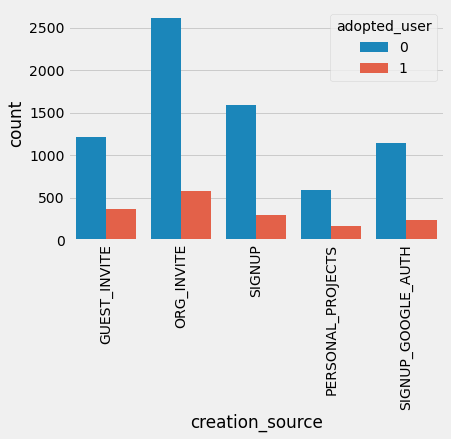

In [25]:
# Creation source and adopted user
_ = sns.countplot(x='creation_source', data=df, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [26]:
# From the graph we did not see much difference among creation sources
# let's do a chi2 test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['creation_source'], df['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [27]:
# chi2 test tells creation_source is significant, but how much was the difference
df.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64

Slightly higher "adopted user" rate in guest_invite and personal_projects, that makes sense because users who got invite probably was collaborting with others, and users who have personal projects are likely to have more personal interest that make them more engaged.

In [28]:
# check mailing list and marketing drip
df.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_user, dtype: float64

In [29]:
def z_test(df, col, target='adopted_user'):
    from statsmodels.stats.weightstats import CompareMeans
    opted_in = df.loc[df[col]==1, target]
    opted_out = df.loc[df[col]==0, target]
    z_data = CompareMeans.from_data(opted_in, opted_out)
    z, p = CompareMeans.ztest_ind(z_data)
    print('For {}, z = {}, p = {}'.format(col, z, p))
z_test(df, 'opted_in_to_mailing_list')

For opted_in_to_mailing_list, z = 0.7029779128148232, p = 0.4820695142048763


In [30]:
df.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_user, dtype: float64

In [31]:
z_test(df, 'enabled_for_marketing_drip')

For enabled_for_marketing_drip, z = 0.4029264950094029, p = 0.6870022995069653


There was really no difference between users who signed up or not for mailing list and marketing drip.

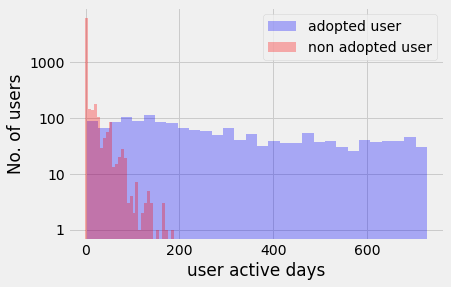

In [32]:
# history and adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[df['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[df['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(df, 'active_days', 'user active days')

Users with longer active days are more likely to be adopted users.

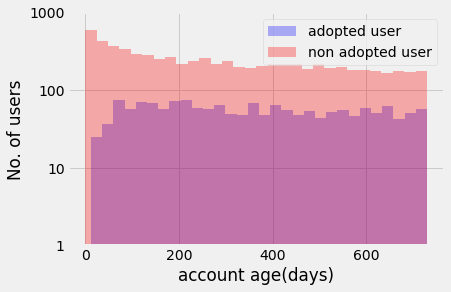

In [33]:
plot_hist_days(df, 'account_age', 'account age(days)')

Adoption rate is lower in new accounts. Other than that, the adoption rate didn't change much over the past two years.

In [34]:
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_days,account_age,email_provider
user_id,,,,,,
1,GUEST_INVITE,1,0,-1.0,38,yahoo.com
2,ORG_INVITE,0,0,135.0,196,gustr.com
3,ORG_INVITE,0,0,-1.0,437,gustr.com
4,GUEST_INVITE,0,0,0.0,374,yahoo.com
5,GUEST_INVITE,0,0,4.0,498,yahoo.com


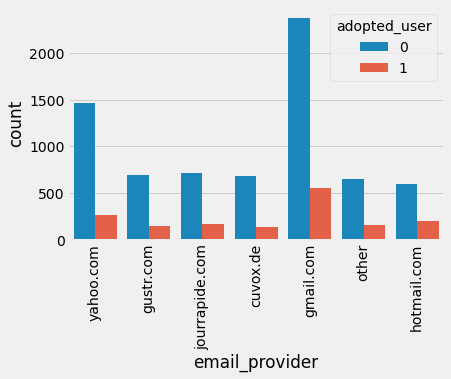

In [35]:
# Let's check on email_provider
_ = sns.countplot(x='email_provider', data=df, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [36]:
# From the graph we did not see much difference among email providers
# let's do a chi2 test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['email_provider'], df['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 39.11760804796107	p = 6.787523400561603e-07


In [37]:
# chi2 test tells email_provider is significant, but how much was the difference
df.groupby('email_provider')['adopted_user'].apply(lambda x: sum(x)/len(x))

email_provider
cuvox.de          0.173913
gmail.com         0.190102
gustr.com         0.178147
hotmail.com       0.255293
jourrapide.com    0.192525
other             0.200986
yahoo.com         0.154693
Name: adopted_user, dtype: float64

Slightly higher "adopted user" rate in users with hotmail.com and lower with yahoo.com. 

### 3. Predictive Modeling

In [38]:
# make dummy variable for creation_source and email_provider
creation_source = pd.get_dummies(df['creation_source'], drop_first=True)
email_provider = pd.get_dummies(df['email_provider'], drop_first=True)
model_data = pd.concat([df, creation_source], axis=1).drop(['creation_source', 'email_provider'], axis=1)
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)
# though account_age and history have different scales than other features,
# I plan to use random forest model, which is not affectd by the different scales
# no need to scale the data
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [39]:
# use random forest model with balanced class weights to correct for imbalance in the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 200}
Best average precision was 0.9626721517744391


In [40]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of test set was 0.9510426110607434
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206

[[1743   49]
 [  59  355]]


In [41]:
# take a look at feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

active_days                   0.892552
account_age                   0.091526
opted_in_to_mailing_list      0.003301
SIGNUP                        0.003094
enabled_for_marketing_drip    0.002936
ORG_INVITE                    0.002646
PERSONAL_PROJECTS             0.001976
SIGNUP_GOOGLE_AUTH            0.001970
dtype: float64


It is clear that active_days is the most important feature and account_age is the second most important. These two features are relevant that longer active_days is positively correlated to honger account_age. Based on this, I would recommend to Relax that an effective way of growing adoption rate might be encouraging existing users to log in and use the software after they had accounts for a while.

The next important feature is opted_in_to_mailing_list. Relax is suggested to increase their rate of user opted into receiving marketing emails. 

Among the four creation source, SIGNUP (sign up via website) is the most important feature and ORG_INVITE is the second most important featue relevant to adoption rate. Relax needs to improve the website user experience and promotions or users to sign up via website, and incentive organizations to send out invites to potential users.

The fourth important feature is enabled_for_marketing_drip. Thus, Relax needs to attract  users to be enabled for regular marketing email drip. 